## 6.5 Machine Learning Part 2

### This script contains the following:
1. Importing libraries and data 
2. The elbow technique
3. k-means clustering

### Importing libraries and data 

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where we import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [80]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [81]:
# Tell Python to remember a main folder path
path = r'/Users/gideon/Desktop/King County_USA_House sales'

In [82]:
path

'/Users/gideon/Desktop/King County_USA_House sales'

In [83]:
# Upload the dataset of Housesales_in_USA as df_housesales
df_housesales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Housesales_in_USA.csv'))

In [84]:
df_housesales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
df_housesales.shape

(21613, 21)

In [86]:
df_housesales.drop(['date', 'id'], axis = 1, inplace = True)

In [87]:
df_housesales.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2. The elbow technique

In [88]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [91]:
score = [kmeans[i].fit(df_housesales).score(df_housesales) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-2966158723084613.0,
 -1407659788206104.0,
 -783161891163352.1,
 -513551039177672.06,
 -376967611899539.56,
 -290246812815472.5,
 -232045092392308.9,
 -188351937363962.9,
 -162893181279126.97]

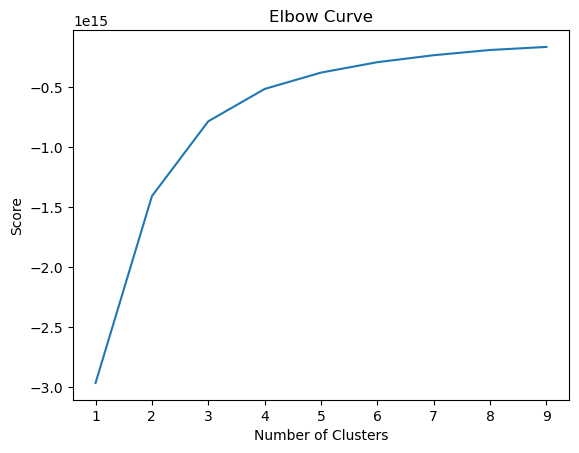

In [92]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### In this example, there's a jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four

### 3. k_means clusterring

In [93]:
kmeans.cluster_centers_[0:3]

AttributeError: 'list' object has no attribute 'cluster_centers_'

In [94]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [95]:
# Fit the k-means object to the data.

kmeans.fit(df_housesales)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [96]:
df_housesales['clusters'] = kmeans.fit_predict(df_housesales)
df_housesales.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [97]:
kmeans.cluster_centers_.shape

(4, 19)

In [98]:
kmeans.labels_.shape

(21613,)

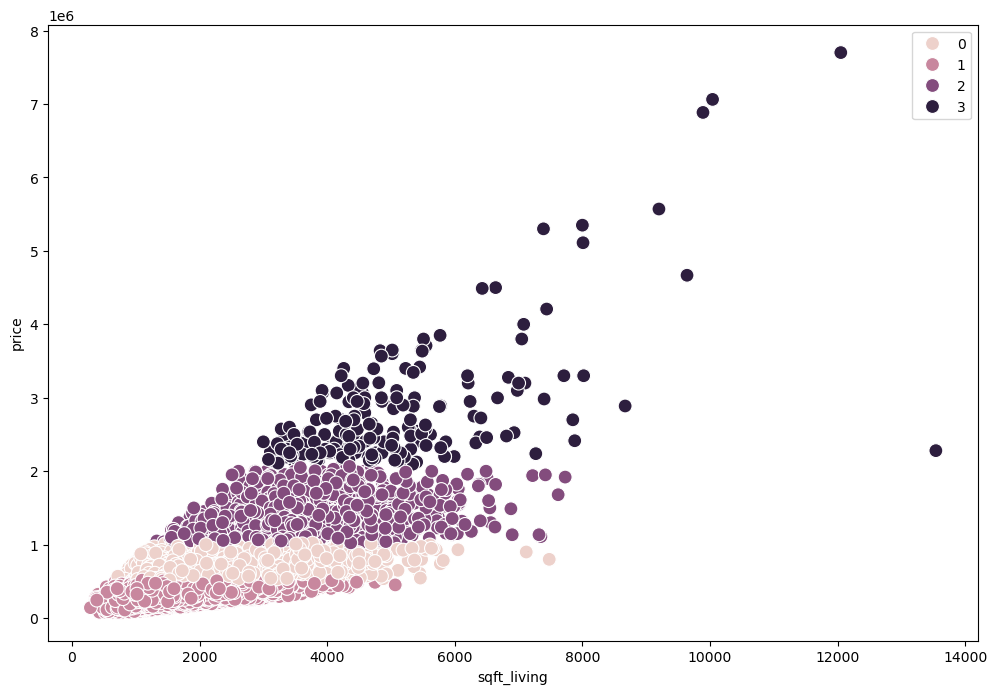

In [103]:
# Plot the clusters for the "price" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['sqft_living'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_living') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

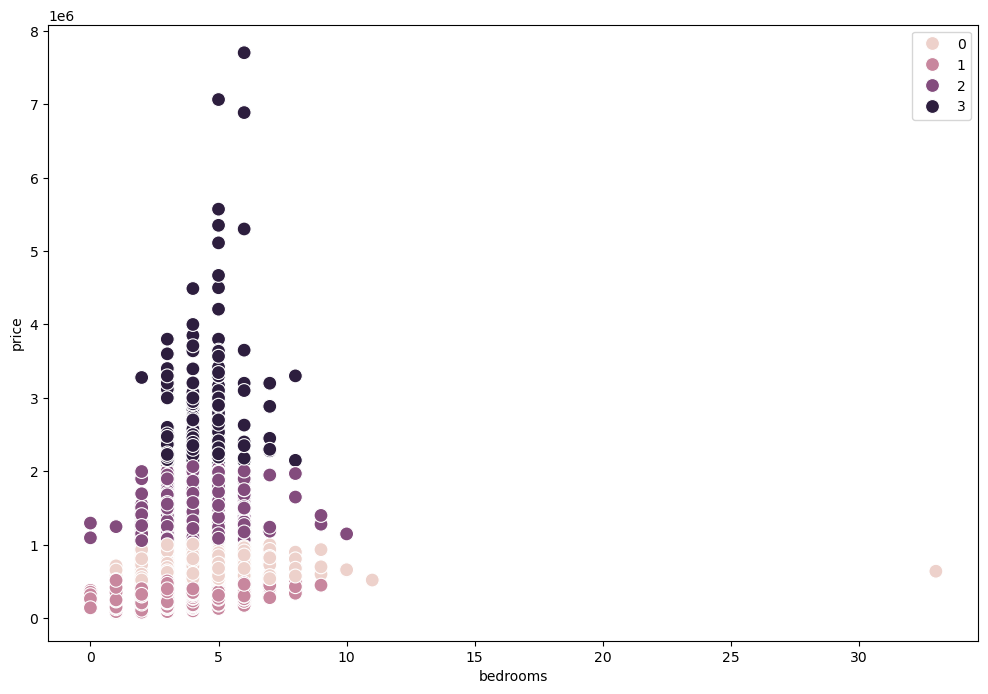

In [104]:
# Plot the clusters for the "price" and "bedrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['bedrooms'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('bedrooms') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

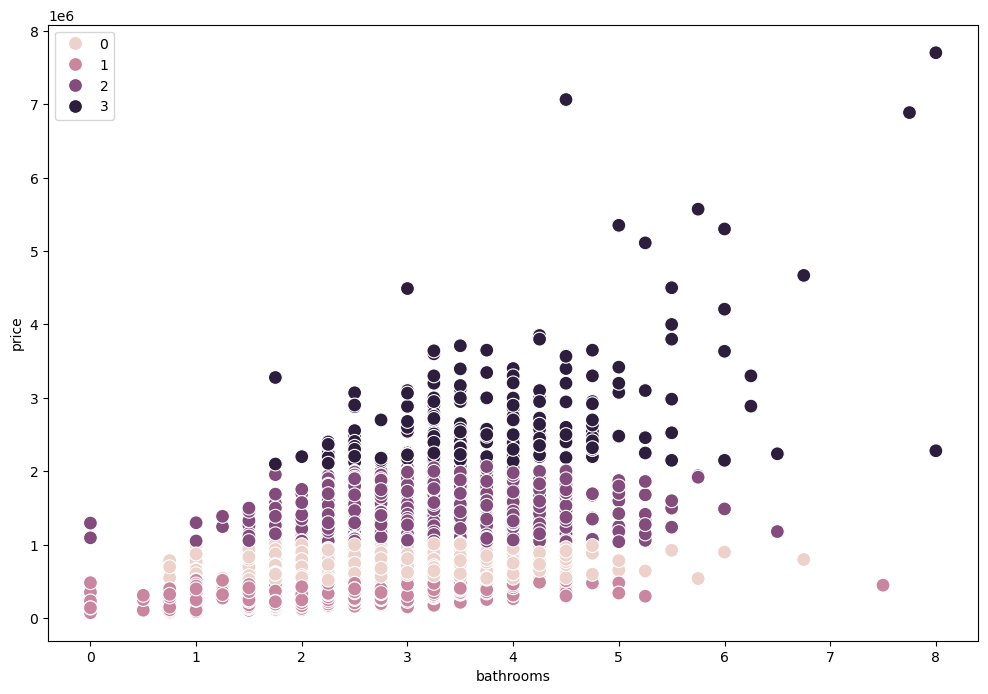

In [105]:
# Plot the clusters for the "price" and "bathrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['bathrooms'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('bathrooms') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

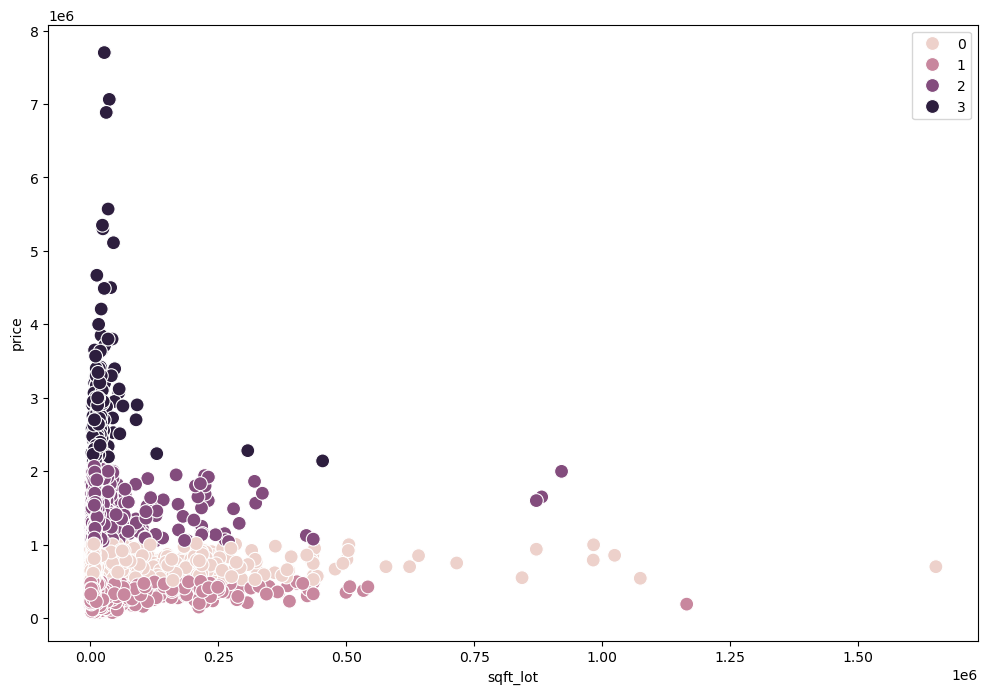

In [106]:
# Plot the clusters for the "price" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['sqft_lot'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_lot') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

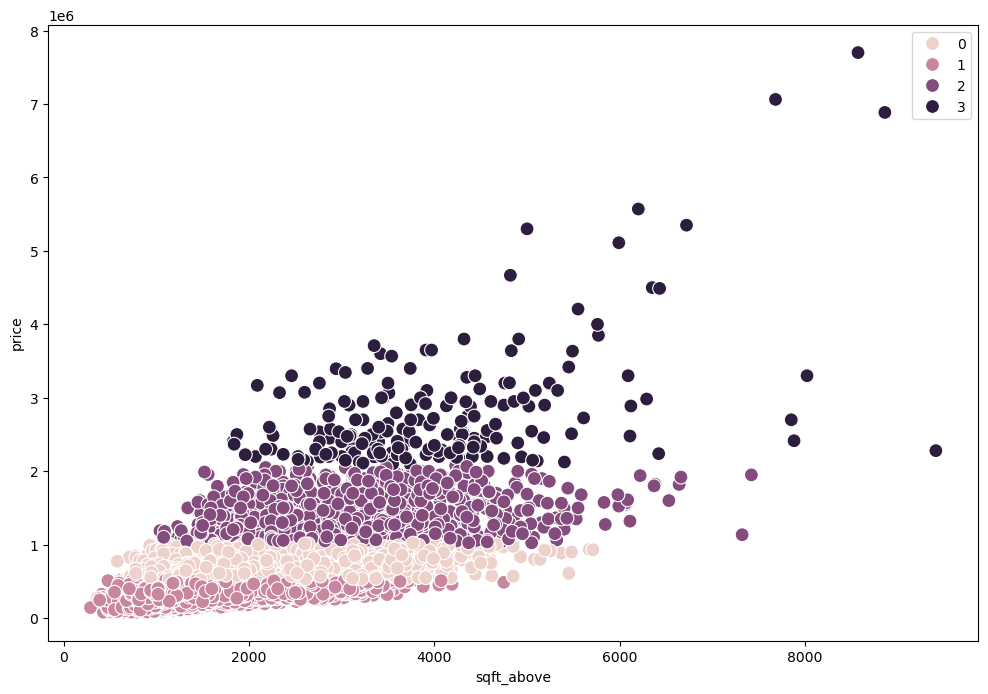

In [107]:
# Plot the clusters for the "sqft_above" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['sqft_above'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_above') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

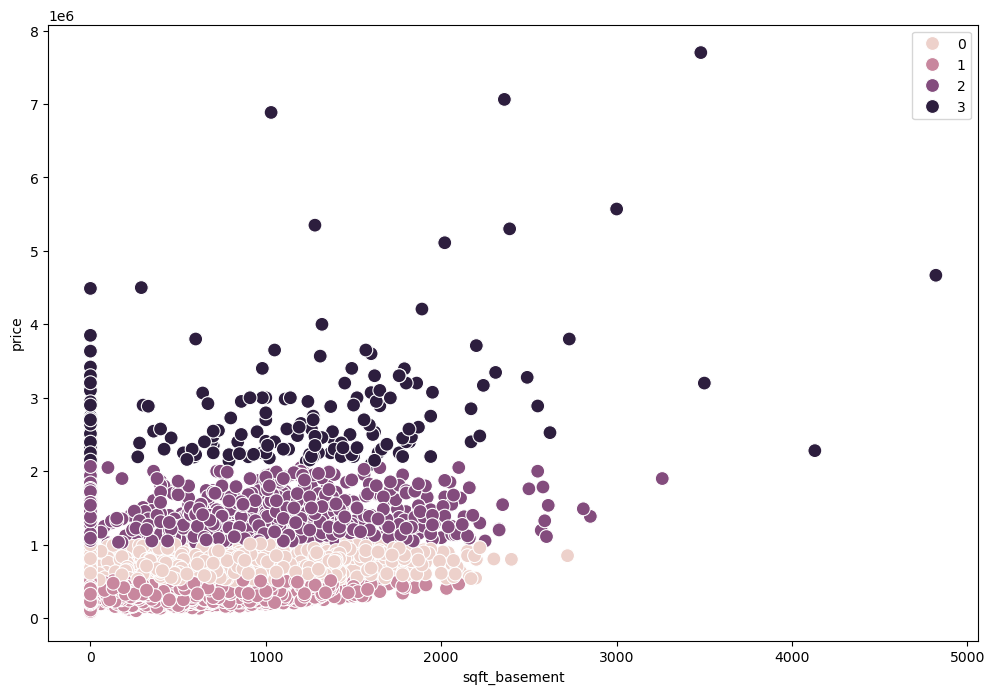

In [108]:
# Plot the clusters for the "sqft_basement" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['sqft_basement'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_basement') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

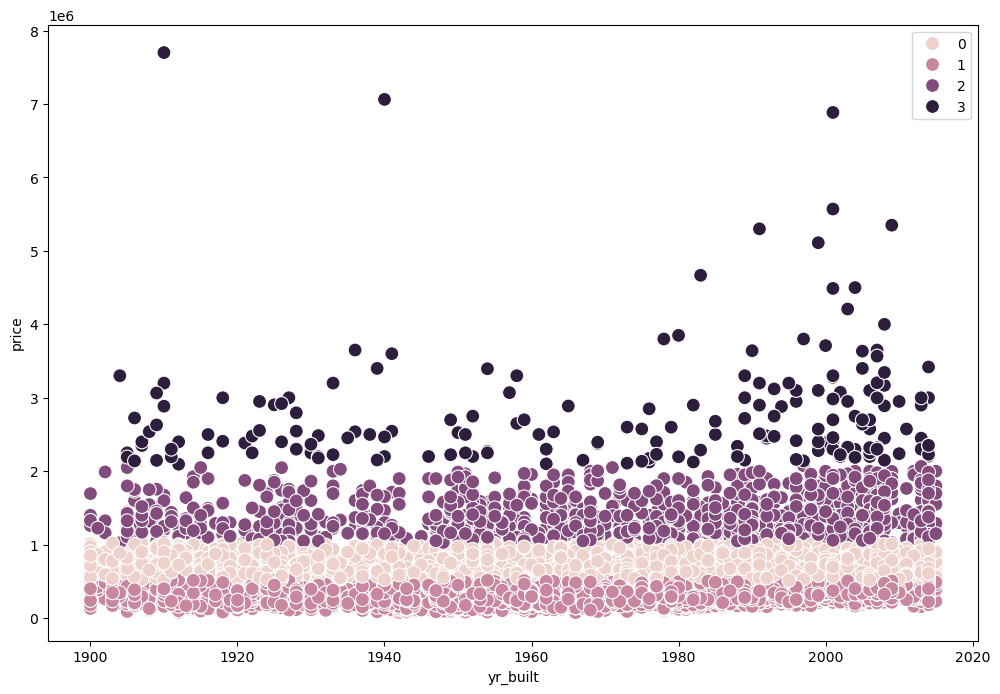

In [109]:
# Plot the clusters for the "yr_built" and "bedrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['yr_built'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('yr_built') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

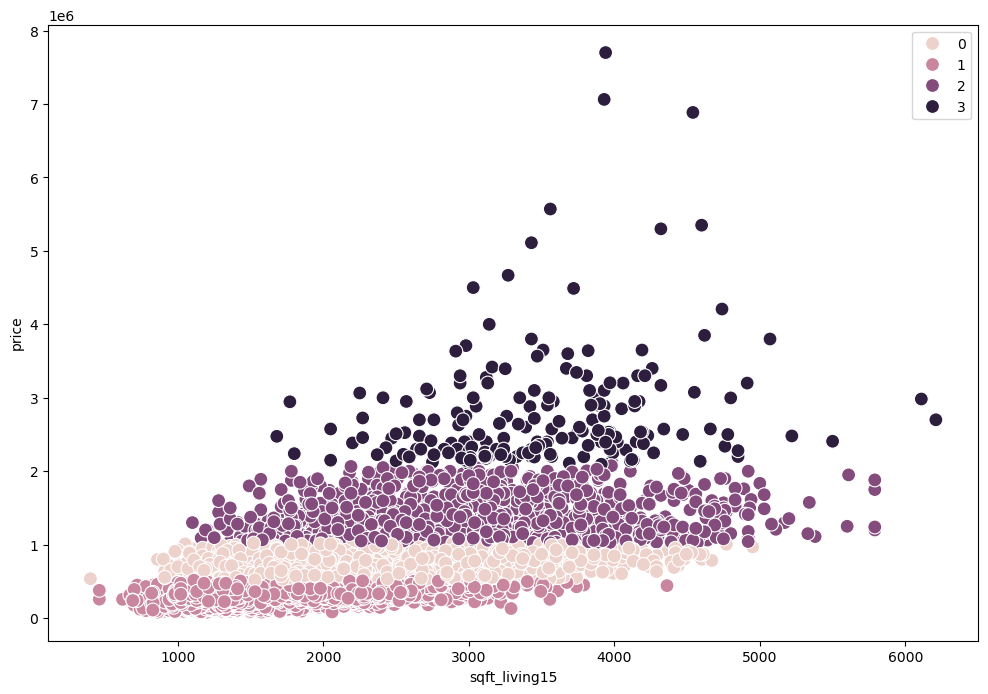

In [110]:
# Plot the clusters for the "sqft_living15" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['sqft_living15'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_living15') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

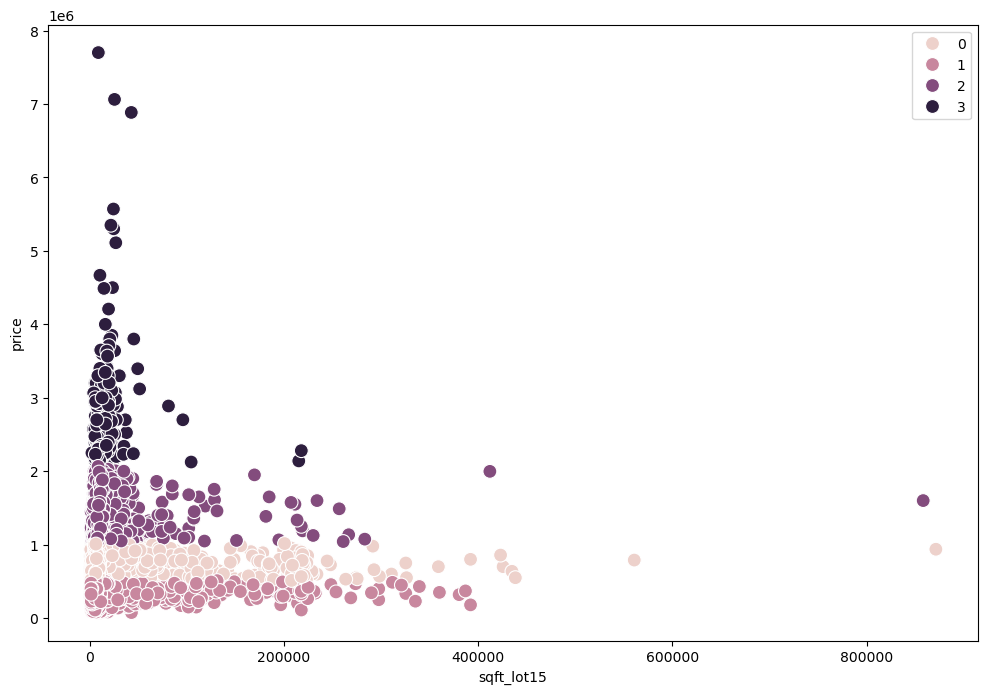

In [111]:
# Plot the clusters for the "sqft_lot15" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['sqft_lot15'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_lot15') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

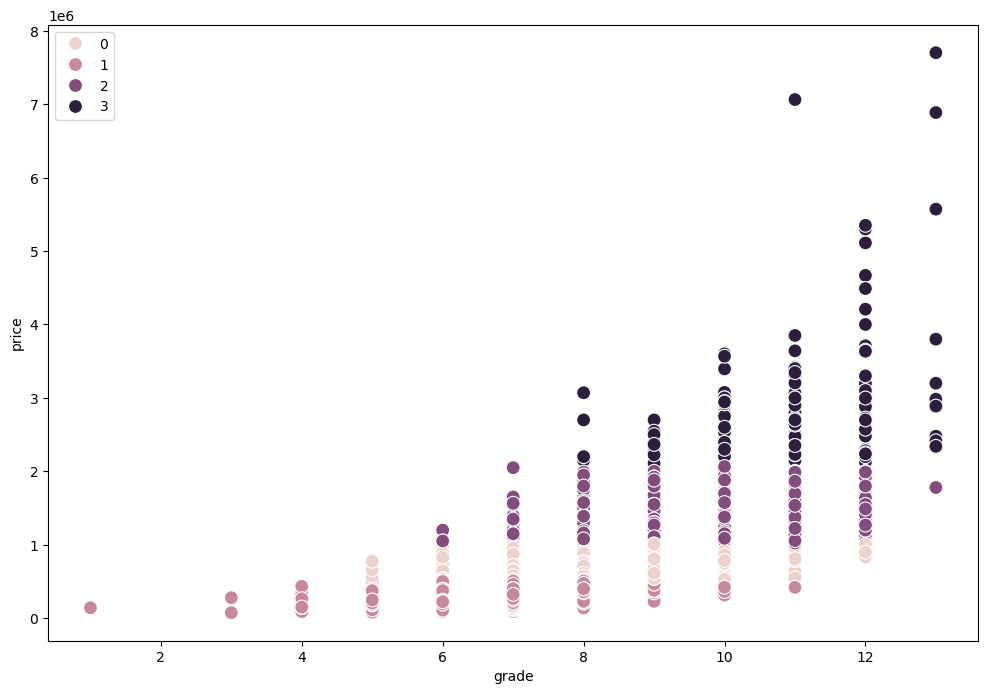

In [112]:
# Plot the clusters for the "grade" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_housesales['grade'], y=df_housesales['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('grade') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

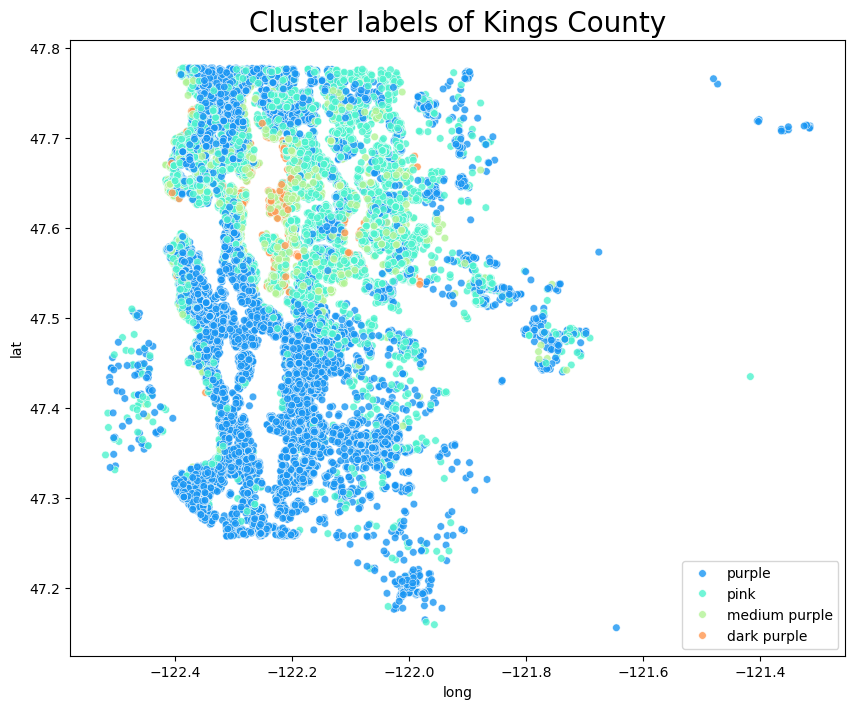

In [128]:
# visualization of the results with a scatter plot
fig = plt.figure(figsize=(10, 8))
plt.title('Cluster labels of Kings County', loc='center', fontsize=20)
sns.scatterplot(x=df_housesales.long, y = df_housesales.lat, alpha = .8,s = 30, 
                hue=df_housesales["cluster"], palette="rainbow", legend= 'auto')
plt.legend(loc = 'lower right');

In [113]:
df_housesales.loc[df_housesales['clusters'] == 3, 'cluster'] = 'dark purple'
df_housesales.loc[df_housesales['clusters'] == 2, 'cluster'] = 'medium purple'
df_housesales.loc[df_housesales['clusters'] == 1, 'cluster'] = 'purple'
df_housesales.loc[df_housesales['clusters'] == 0, 'cluster'] = 'pink'

In [115]:
df_housesales.groupby('cluster').agg({'price':['mean', 'median'], 
                         'sqft_living':['mean', 'median'], 
                         'bedrooms':['mean', 'median'],
                          'bathrooms':['mean', 'median'],
                        'sqft_lot':['mean', 'median'], 
                         'sqft_above':['mean', 'median'],
                            'sqft_lot15':['mean', 'median'],
                            'sqft_living15':['mean', 'median'],
                            'grade':['mean', 'median'],
                          'sqft_basement':['mean', 'median']})
                        
                   

price             sqft_living          bedrooms         \
                       mean     median         mean  median      mean median   
cluster                                                                        
dark purple    2.806109e+06  2528500.0  5094.152632  4730.0  4.352632    4.0   
medium purple  1.358833e+06  1295000.0  3632.033360  3530.0  4.031733    4.0   
pink           6.893509e+05   660000.0  2456.314274  2400.0  3.612290    4.0   
purple         3.452729e+05   345000.0  1676.970161  1600.0  3.158163    3.0   

              bathrooms             sqft_lot            sqft_above          \
                   mean median          mean   median         mean  median   
cluster                                                                      
dark purple    3.873684   3.75  23010.052632  15972.0  4058.752632  3840.5   
medium purple  3.072823   3.00  23428.882832  10361.0  2986.772986  2810.0   
pink           2.362428   2.50  18995.983604   7463.5  2093.682833  1945.0   
purple         1.858940   1.75  12018.246289   7500.0  1469.900356  1340.0   

                 sqft_lot15          sqft_living15              grade         \
                       mean   median          mean  median       mean median   
cluster                                                                        
dark purple    18656.873684  14100.0   3516.910526  3470.0  10.752632   11.0   
medium purple  18148.820179  10125.0   3017.862490  2950.0   9.637103   10.0   
pink           15028.403417   7416.5   2271.116423  2200.0   8.187793    8.0   
purple         10902.811843   7560.0   1706.433983  1630.0   7.125387    7.0   

              sqft_basement          
                       mean  median  
cluster                              
dark purple     1035.400000  1025.0  
medium purple    645.260374   630.0  
pink             362.631441     0.0  
purple           207.069805     0.0

## Judging by these statistics, you can state a few facts:
- The dark purple cluster has the best stats in almost all categories. 
- From the sqft_living cluster graphs(sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_lot15 and sqft_living15) the best rated cluster(dark purple) has the higher median. which states that the price of the house increases with the sqft_living area.
- From the bedrooms and the bathrooms cluster graph, we can see the best stats with medium purple cluster and the dark purple cluster.
  

In [119]:
df_housesales[df_housesales['clusters']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
price,7258.0,689350.867181,130077.469905,510000.0000,578125.0000,660000.0000,780000.0000,1.020000e+06
bedrooms,7258.0,3.612290,0.948515,1.0000,3.0000,4.0000,4.0000,3.300000e+01
bathrooms,7258.0,2.362428,0.670742,0.7500,2.0000,2.5000,2.7500,6.750000e+00
sqft_living,7258.0,2456.314274,768.243047,720.0000,1900.0000,2400.0000,2957.5000,7.480000e+03
sqft_lot,7258.0,18995.983604,54396.004676,520.0000,4950.2500,7463.5000,11900.0000,1.651359e+06
floors,7258.0,1.621934,0.525050,1.0000,1.0000,2.0000,2.0000,3.500000e+00
waterfront,7258.0,0.006062,0.077630,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,7258.0,0.311656,0.845762,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition,7258.0,3.442959,0.668890,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,7258.0,8.187793,1.008647,5.0000,7.0000,8.0000,9.0000,1.200000e+01


#### Cluster label '0' with mean house value of $0.69 million ranging from 0.51 million to over 1.02 million dollars. Houses in this cluster consists of an average of 1 bedrooms with mean living area of 2456 Sqft. 15 houses in the immediate neighborhood with an average area of 2271 sqft with with the average no. of floors are 1.6 and with no waterfront.

In [118]:
df_housesales[df_housesales['clusters']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
price,12936.0,345272.870594,95169.372033,75000.0000,270000.000000,345000.0000,425000.000000,5.175000e+05
bedrooms,12936.0,3.158163,0.846028,0.0000,3.000000,3.0000,4.000000,9.000000e+00
bathrooms,12936.0,1.858940,0.656347,0.0000,1.000000,1.7500,2.500000,7.500000e+00
sqft_living,12936.0,1676.970161,587.626968,290.0000,1250.000000,1600.0000,2040.000000,5.067000e+03
sqft_lot,12936.0,12018.246289,28640.019235,572.0000,5100.000000,7500.0000,9798.500000,1.164794e+06
floors,12936.0,1.387871,0.524182,1.0000,1.000000,1.0000,2.000000,3.500000e+00
waterfront,12936.0,0.001160,0.034034,0.0000,0.000000,0.0000,0.000000,1.000000e+00
view,12936.0,0.080087,0.427597,0.0000,0.000000,0.0000,0.000000,4.000000e+00
condition,12936.0,3.383813,0.632050,1.0000,3.000000,3.0000,4.000000,5.000000e+00
grade,12936.0,7.125387,0.800204,1.0000,7.000000,7.0000,8.000000,1.100000e+01


#### Cluster label 1 with mean house value of $3.4 million ranging from 0.75 million to 5.17 million dollars. Houses in this cluster consist of an average of 3 bedrooms with a mean living area of 1676 Sqft. 15 houses in the immediate neighborhood with an average area of 1706 sqft. Cluster 2 occupies the count of most number of houses. The houses that belong to cluster 2 are of widespread all over King County.

In [120]:
df_housesales[df_housesales['clusters']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1229.0,1.358833e+06,262653.729435,1.025000e+06,1.150000e+06,1.295000e+06,1.535000e+06,2.075000e+06
bedrooms,1229.0,4.031733e+00,0.898679,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
bathrooms,1229.0,3.072823e+00,0.777054,0.000000e+00,2.500000e+00,3.000000e+00,3.500000e+00,6.500000e+00
sqft_living,1229.0,3.632033e+03,985.067273,1.330000e+03,2.920000e+03,3.530000e+03,4.230000e+03,7.730000e+03
sqft_lot,1229.0,2.342888e+04,59524.155741,6.090000e+02,6.500000e+03,1.036100e+04,1.785300e+04,9.204230e+05
floors,1229.0,1.801058e+00,0.490636,1.000000e+00,1.500000e+00,2.000000e+00,2.000000e+00,3.500000e+00
waterfront,1229.0,4.800651e-02,0.213867,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,1229.0,1.126119e+00,1.472730,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00
condition,1229.0,3.466233e+00,0.707020,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,1229.0,9.637103e+00,1.148625,6.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01,1.300000e+01


#### Cluster label 2 with mean house value of $1.35 million ranging from 1.025 million to 2.07 million dollars. Houses in this cluster consists of an average of 4 bedrooms with mean living area of 3632 Sqft. 15 houses in the immediate neighborhood with an average area of 3017 sqft.

In [121]:
df_housesales[df_housesales['clusters']==3].describe().T

,count,mean,std,min,25%,50%,75%,max
price,190.0,2.806109e+06,848650.845049,2.095000e+06,2.298500e+06,2.528500e+06,3.000000e+06,7.700000e+06
bedrooms,190.0,4.352632e+00,0.995688,2.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00
bathrooms,190.0,3.873684e+00,1.109944,1.750000e+00,3.250000e+00,3.750000e+00,4.500000e+00,8.000000e+00
sqft_living,190.0,5.094153e+03,1582.993528,3.000000e+03,4.095000e+03,4.730000e+03,5.540000e+03,1.354000e+04
sqft_lot,190.0,2.301005e+04,40813.809166,3.452000e+03,1.021275e+04,1.597200e+04,2.259150e+04,4.538950e+05
floors,190.0,1.881579e+00,0.474679,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.500000e+00
waterfront,190.0,2.368421e-01,0.426268,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,190.0,2.010526e+00,1.696525,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
condition,190.0,3.505263e+00,0.732809,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,190.0,1.075263e+01,1.115959,8.000000e+00,1.000000e+01,1.100000e+01,1.100000e+01,1.300000e+01


#### From the clusters, we can see that the count of cluster 3 is very less when compared to other clusters i.e 190. Cluster label 3 with mean house value of $2.8 million ranging from 2.1 million to 7.7 million dollars. Houses in this cluster consists of an average of 4.3 bedrooms with mean living area of 5094 Sqft. 15 houses in the immediate neighborhood were with an average area of 3517 sqft. The houses in this cluster can be classified as the most expensive houses based on the statistics.
  